In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# S24

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/A_datasci/cleaned_s24_price_in_thb.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,price_inr,date,price_thb
0,79999.0,2024-01-18 14:24:00,35199.56
1,79999.0,2024-01-20 10:08:12,35199.56
2,79999.0,2024-01-24 12:52:25,35199.56
3,79999.0,2024-01-28 18:52:00,35199.56
4,79999.0,2024-01-29 02:48:00,35199.56


## Data Validation

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   price_inr  490 non-null    float64       
 1   date       490 non-null    datetime64[ns]
 2   price_thb  490 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 11.6 KB


,price_inr,date,price_thb
count,490.000000,490,490.000000
mean,61831.924592,2025-01-27 23:23:12.740816384,27206.046820
min,46500.000000,2024-01-18 14:24:00,20460.000000
25%,52499.000000,2024-09-17 10:15:00.500000,23099.560000
50%,57723.000000,2025-02-27 07:56:10.500000,25398.120000
75%,67999.000000,2025-06-29 15:19:17,29919.560000
max,79999.000000,2025-10-29 12:10:32,35199.560000
std,10893.437604,NaN,4793.112546


## Time Series Trend

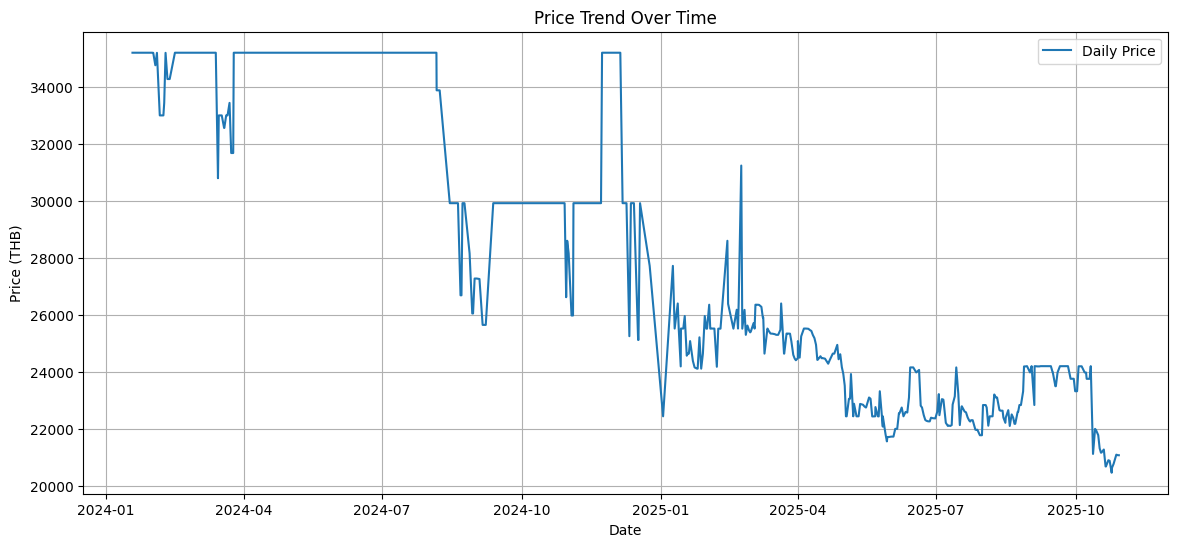

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['price_thb'], label='Daily Price')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price (THB)')
plt.grid(True)
plt.legend()
plt.show()

## Moving Average (MA7, MA14)

- MA7 = เทรนด์ระยะสั้น
- MA14 = เทรนด์ระยะกลาง
- MA7 ต่ำกว่า MA14 = ราคา “กำลังลง”
- MA7 ตัด MA14 ขึ้นด้านบน = ราคากำลังขึ้น
- MA ทั้ง 2 เส้นค่อย ๆ ลดระดับลง แสดงว่าราคาสินค้ามีทิศทางลดลงอย่างต่อเนื่องตามการเปลี่ยนรุ่นของมือถือ

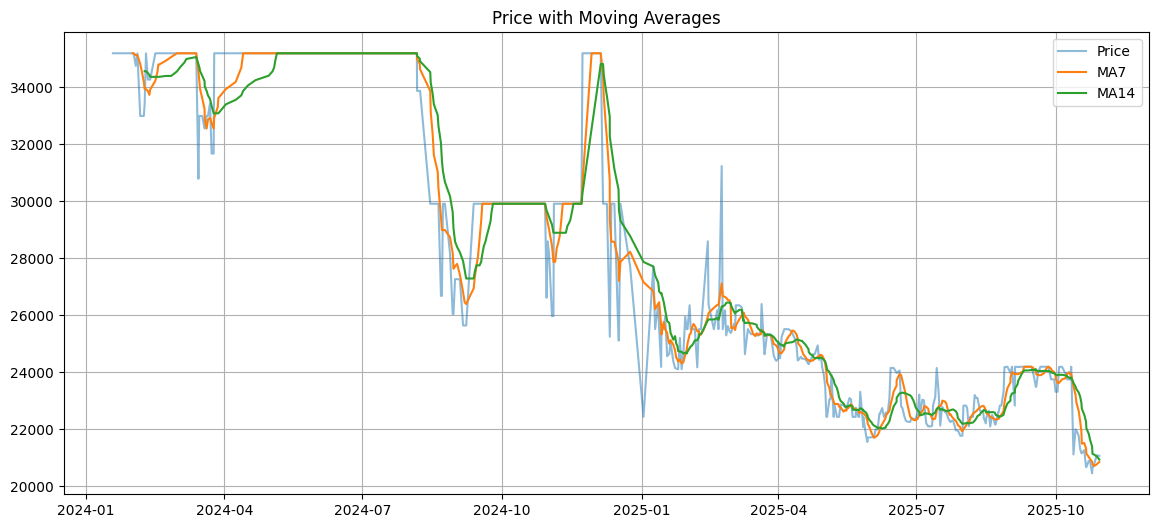

In [ ]:
df['MA7'] = df['price_thb'].rolling(7).mean()
df['MA14'] = df['price_thb'].rolling(14).mean()

plt.figure(figsize=(14,6))
plt.plot(df['date'], df['price_thb'], alpha=0.5, label='Price')
plt.plot(df['date'], df['MA7'], label='MA7')
plt.plot(df['date'], df['MA14'], label='MA14')
plt.title('Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

## Price Distribution & Outlier Detection

> Histogram



> histogram
- ช่วงราคา 22k–26k ซึ่งเป็นช่วงราคาปกติที่คนส่วนมากจะได้เจอ แต่ก็มีอีกกลุ่มราคาที่โผล่ช่วง 28k–30k และอีกช่วงที่ราคาราว 34k
- ไม่ใช่ราคาผิดปกติ หรือราคาที่ถูกตั้งมั่วๆ แต่คาดว่ามันคือราคาเปิดตัวของมือถือรุ่นนี้
- ซึ่งเมื่อกาลเวลาผ่านไปตาม cycle ของโทรศัพท์ มักจะทำให้มูลค่าของมันลดลง
- ทำให้ histogram นั้นแสดงข้อมูลราคาหลายก้อน ซึ่งตรงกับพฤติกรรมของสินค้าประเภทนี้


> KDE หรือเส้นโค้งในชาร์ต
- Distribution เป็นแบบหลายยอดเป็นพฤติกรรมปกติของสินค้าเทคโนโลยีที่หมดมูลค่าตามเวลา
- ช่วงที่พบมากที่สุดคือช่วงประมาณ 22k - 26k คือราคาที่ผู้บริโภคเจอบ่อยที่สุดในช่วงของราคาสินค้า
- กลุ่มราคาต่ำ ซึ่งน้อยกว่า 22k อาจเกิดจากการจัดโปรหรือการลดราคาของสินค้าตัวนั้นตามกาลเวลาเช่นกัน


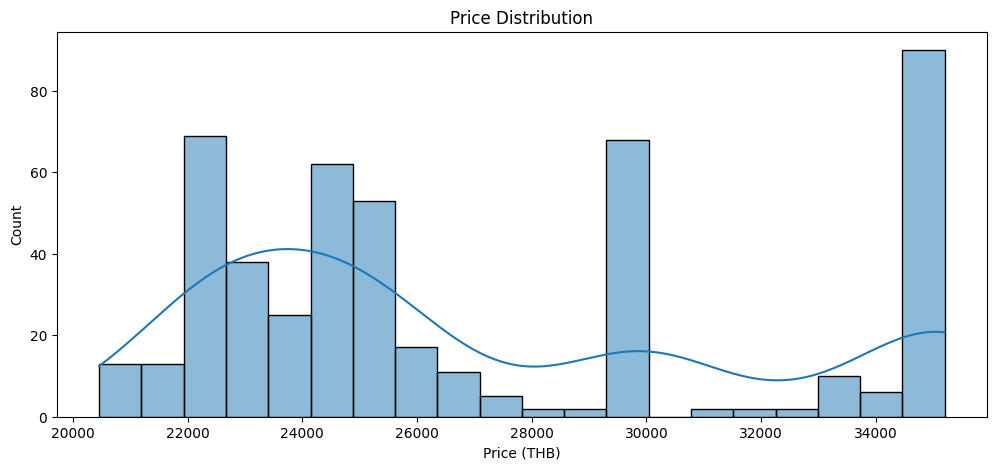

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df['price_thb'], kde=True, bins=20)
plt.title('Price Distribution')
plt.xlabel('Price (THB)')
plt.show()



> Boxplot



- whisker ด้านขวานั้นยาวกว่า แต่มันกลับไม่ใช่ error data หรือราคาปั่น แต่มันคือราคาสูงที่เกิดจากการวางขายสินค้าตัวนี้เป็นครั้งแรก
- กล่อง iqr มีขนาดกว้าง เกิดจากราคาสินค้าที่มีการลดราคาตามอายุสินค้าที่ค่อนข้างเร็ว แต่สะท้อนถึงกลไกราคาของสินค้าประเภทนี้ที่เมื่อเวลาผ่านไป และมีรุ่นใหม่ออกมา รุ่นเดิมๆ ก็จะถูกลดราคาลงเรื่อยๆ
- median อยู่ประมาณกลางกล่อง เป็นเพราะราคาที่ค่อยๆ ลดลงตามกาลเวลาของสินค้าประเภทนี้

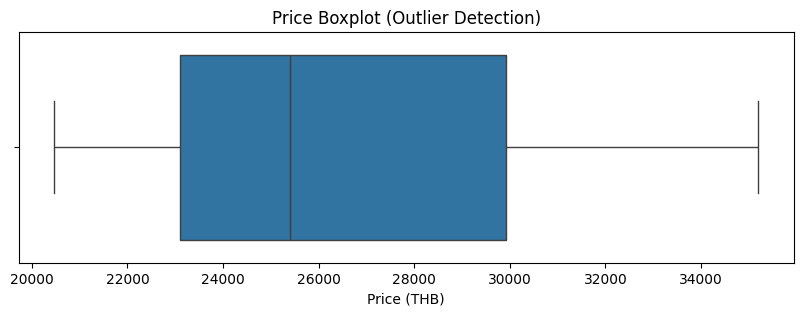

In [ ]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['price_thb'])
plt.title('Price Boxplot (Outlier Detection)')
plt.xlabel('Price (THB)')
plt.show()

## Daily Price Change (%)

- การเปลี่ยนแปลงราคาวันต่อวันชี้ให้เห็นจุดที่มี Flash Sale หรือวันที่ร้านปรับราคาขึ้นหลังโปรหมด

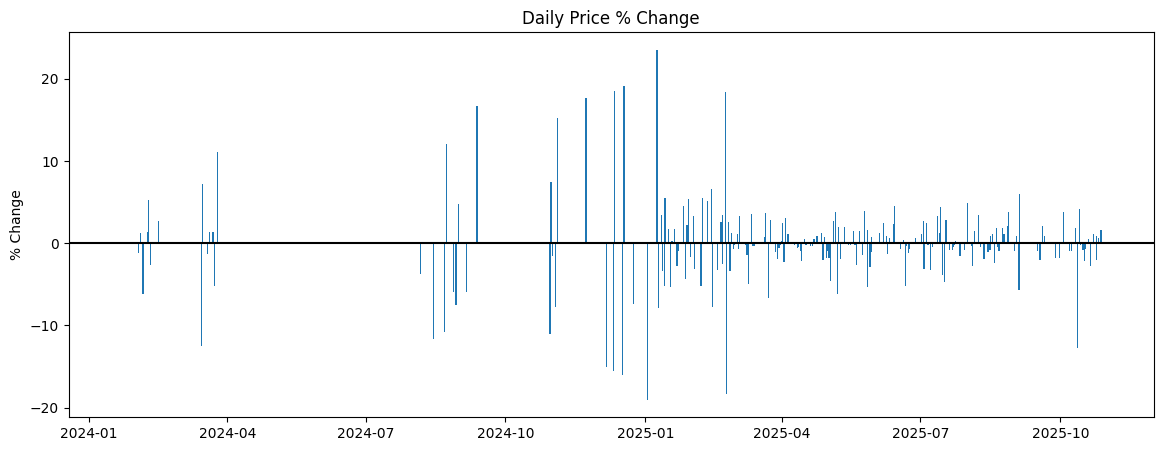

In [ ]:
df['pct_change'] = df['price_thb'].pct_change() * 100
plt.figure(figsize=(14,5))
plt.bar(df['date'], df['pct_change'])
plt.axhline(0, color='black')
plt.title('Daily Price % Change')
plt.ylabel('% Change')
plt.show()

# a55

In [ ]:
a55_df = pd.read_csv('/content/drive/MyDrive/A_datasci/a55_from_html.csv')
a55_df['date'] = pd.to_datetime(df['date'])
df.head()

,price_inr,date,price_thb,MA7,MA14,pct_change
0,79999.0,2024-01-18 14:24:00,35199.56,NaN,NaN,NaN
1,79999.0,2024-01-20 10:08:12,35199.56,NaN,NaN,0.0
2,79999.0,2024-01-24 12:52:25,35199.56,NaN,NaN,0.0
3,79999.0,2024-01-28 18:52:00,35199.56,NaN,NaN,0.0
4,79999.0,2024-01-29 02:48:00,35199.56,NaN,NaN,0.0


## Data Validate

In [ ]:
a55_df.info()
a55_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   price_inr  363 non-null    int64         
 1   date       363 non-null    datetime64[ns]
 2   price_thb  363 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.6 KB


,price_inr,date,price_thb
count,363.000000,363,363.000000
mean,30912.779614,2024-11-14 23:40:16.691460096,13601.623030
min,23999.000000,2024-01-18 14:24:00,10559.560000
25%,25999.000000,2024-07-29 23:23:49,11439.560000
50%,29999.000000,2024-11-30 01:09:43,13199.560000
75%,33999.000000,2025-03-25 22:28:55.500000,14959.560000
max,42999.000000,2025-06-24 18:31:50,18919.560000
std,5514.302063,NaN,2426.292908


## Time Series Trend

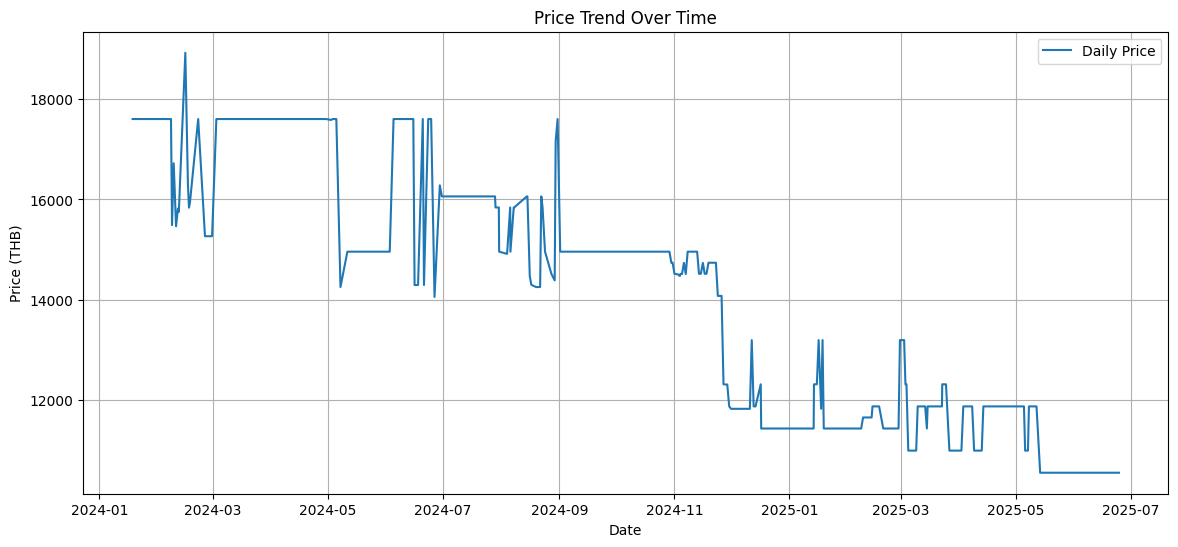

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(a55_df['date'], a55_df['price_thb'], label='Daily Price')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price (THB)')
plt.grid(True)
plt.legend()
plt.show()

## Moving Average (MA7, MA14)

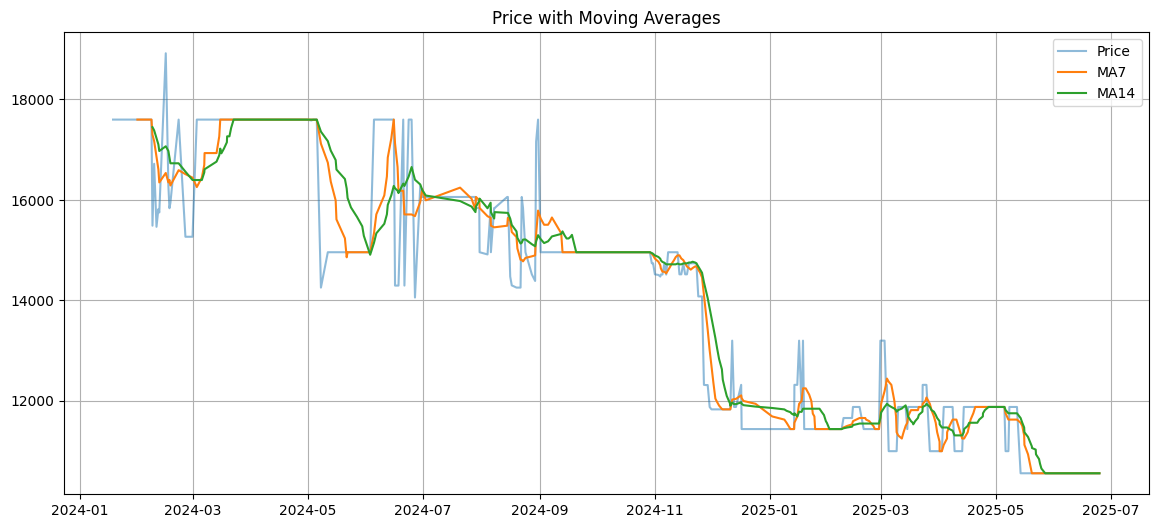

In [ ]:
a55_df['MA7'] = a55_df['price_thb'].rolling(7).mean()
a55_df['MA14'] = a55_df['price_thb'].rolling(14).mean()

plt.figure(figsize=(14,6))
plt.plot(a55_df['date'], a55_df['price_thb'], alpha=0.5, label='Price')
plt.plot(a55_df['date'], a55_df['MA7'], label='MA7')
plt.plot(a55_df['date'], a55_df['MA14'], label='MA14')
plt.title('Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

## Price Distribution & Outlier Detection

> Histogram

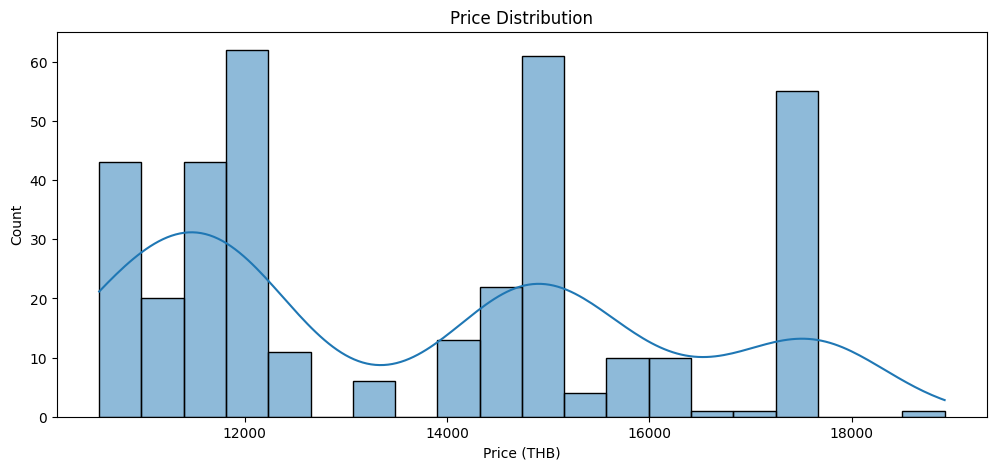

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(a55_df['price_thb'], kde=True, bins=20)
plt.title('Price Distribution')
plt.xlabel('Price (THB)')
plt.show()

> Boxplot

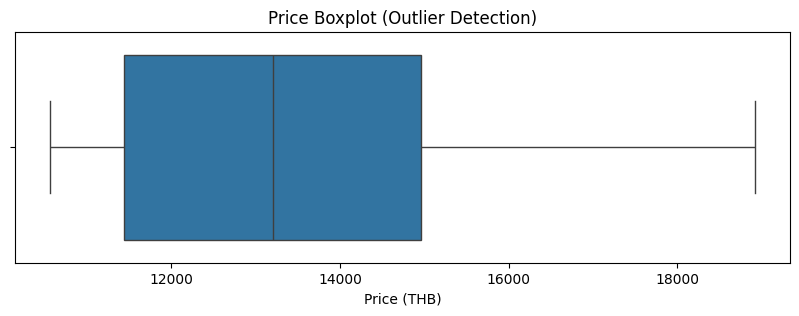

In [ ]:
plt.figure(figsize=(10,3))
sns.boxplot(x=a55_df['price_thb'])
plt.title('Price Boxplot (Outlier Detection)')
plt.xlabel('Price (THB)')
plt.show()

## Daily Price Change (%)

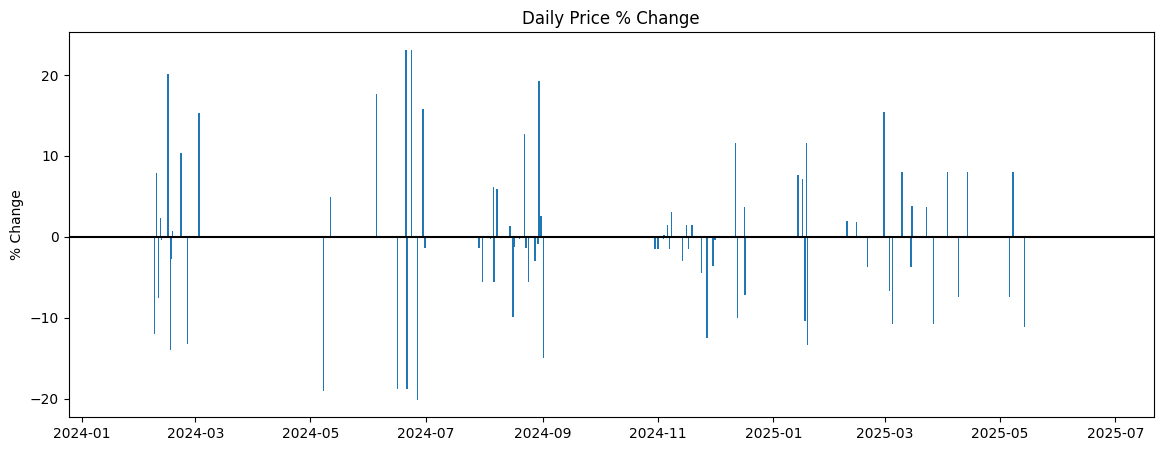

In [ ]:
a55_df['pct_change'] = a55_df['price_thb'].pct_change() * 100
plt.figure(figsize=(14,5))
plt.bar(a55_df['date'], a55_df['pct_change'])
plt.axhline(0, color='black')
plt.title('Daily Price % Change')
plt.ylabel('% Change')
plt.show()

# a55 vs s24

## load data

In [ ]:
# โหลดข้อมูล
s24 = pd.read_csv('/content/drive/MyDrive/A_datasci/s24_price_in_thb.csv')
a55 = pd.read_csv('/content/drive/MyDrive/A_datasci/a55_from_html.csv')

# แปลง date เป็น datetime
s24['date'] = pd.to_datetime(s24['date'])
a55['date'] = pd.to_datetime(a55['date'])

# ใส่ชื่อรุ่นให้ชัดเจน
s24['product'] = 'Galaxy S24'
a55['product'] = 'Galaxy A55'

# รวมเป็นตารางเดียว
df_all = pd.concat([s24, a55], ignore_index=True)

df_all.head()


,price_inr,date,price_thb,product
0,79999.0,2024-01-18 14:24:00,35199.56,Galaxy S24
1,79999.0,2024-01-20 10:08:12,35199.56,Galaxy S24
2,79999.0,2024-01-24 12:52:25,35199.56,Galaxy S24
3,79999.0,2024-01-28 18:52:00,35199.56,Galaxy S24
4,79999.0,2024-01-29 02:48:00,35199.56,Galaxy S24


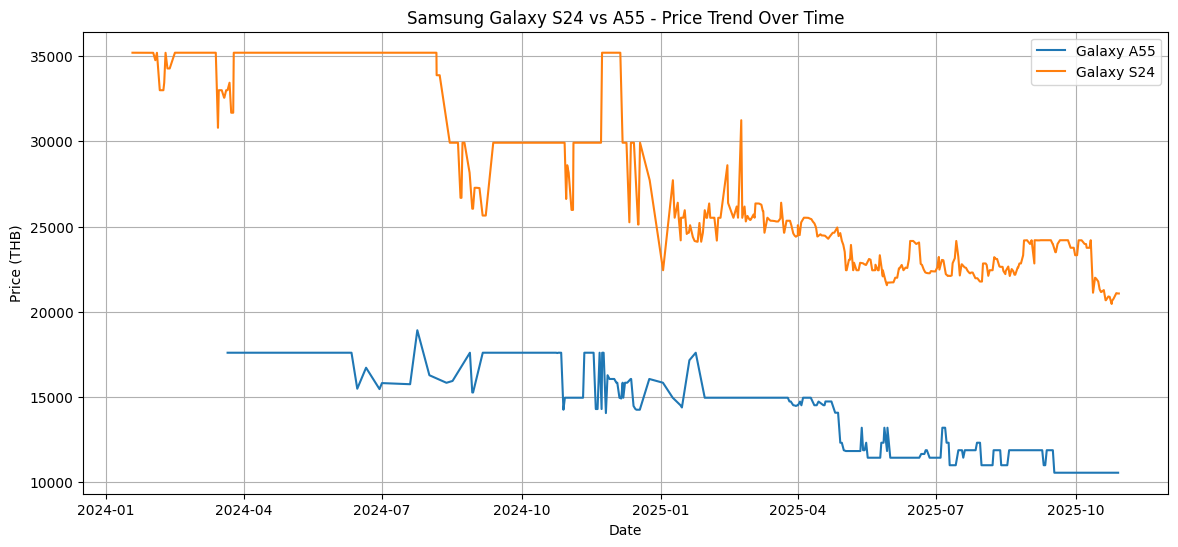

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

for name, dfg in df_all.groupby('product'):
    plt.plot(dfg['date'], dfg['price_thb'], label=name)

plt.title('Samsung Galaxy S24 vs A55 - Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price (THB)')
plt.grid(True)
plt.legend()
plt.show()


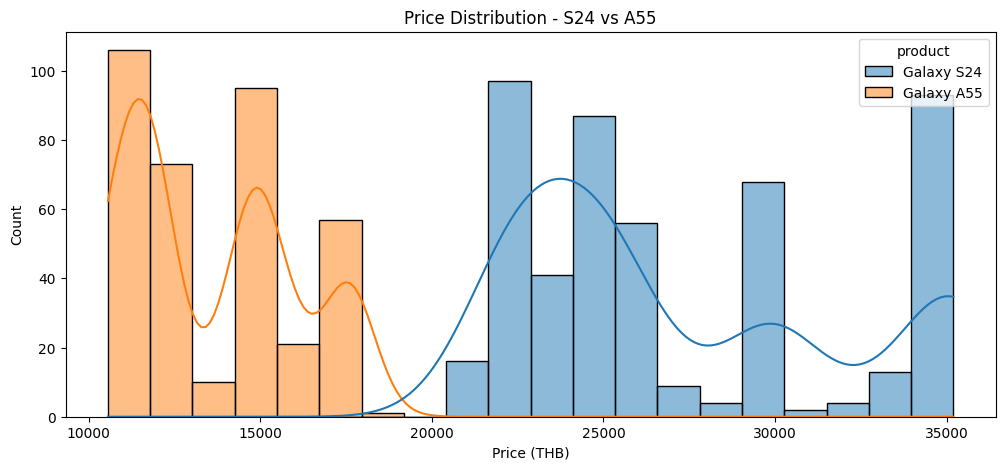

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(data=df_all, x='price_thb', hue='product', kde=True, bins=20, alpha=0.5)
plt.title('Price Distribution - S24 vs A55')
plt.xlabel('Price (THB)')
plt.show()


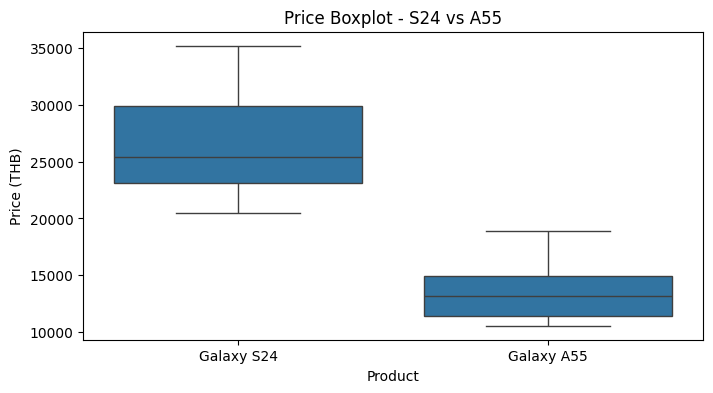

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_all, x='product', y='price_thb')
plt.title('Price Boxplot - S24 vs A55')
plt.xlabel('Product')
plt.ylabel('Price (THB)')
plt.show()


In [ ]:
summary = df_all.groupby('product')['price_thb'].agg(
    min_price='min',
    max_price='max',
    avg_price='mean',
    std_price='std',
    count='count'
).reset_index()

summary

,product,min_price,max_price,avg_price,std_price,count
0,Galaxy A55,10559.56,18919.56,13601.62303,2426.292908,363
1,Galaxy S24,20460.00,35199.56,27206.04682,4793.112546,490


In [ ]:
diff_avg = summary.loc[summary['product']=='Galaxy S24','avg_price'].values[0] - \
           summary.loc[summary['product']=='Galaxy A55','avg_price'].values[0]
print(f"S24 แพงกว่า A55 โดยเฉลี่ยประมาณ {diff_avg:.2f} บาท")

S24 แพงกว่า A55 โดยเฉลี่ยประมาณ 13604.42 บาท


# Data Cleaning Pipeline

In [ ]:
def load_and_tag(path, product_name):
    df = pd.read_csv(path)
    df['date'] = pd.to_datetime(df['date'])
    df['product'] = product_name
    return df

In [ ]:
def clean_data(df):
    df = df.drop_duplicates()
    df = df[df['price_thb'] > 0]
    df = df.sort_values(['product', 'date'])
    return df

In [ ]:
def feature_engineering(df):

    # สร้างฟีเจอร์รายสินค้า (groupby product)
    # 1) การเปลี่ยนแปลงราคา
    df['price_diff'] = df.groupby('product')['price_thb'].diff()

    # 2) เปอร์เซ็นต์การเปลี่ยนแปลง
    df['pct_change'] = df.groupby('product')['price_thb'].pct_change() * 100

    # 3) Moving Averages
    df['MA7'] = df.groupby('product')['price_thb'].rolling(7).mean().reset_index(level=0, drop=True)
    df['MA14'] = df.groupby('product')['price_thb'].rolling(14).mean().reset_index(level=0, drop=True)

    # 4) day index (ใช้ forecast ได้)
    df['day_index'] = df.groupby('product').cumcount()

    return df

In [ ]:
def save_data(df, output_path):
    df.to_csv(output_path, index=False)
    print(f"✔ Saved cleaned dataset: {output_path}")

In [ ]:
def run_pipeline():

    print("Loading datasets...")
    s24 = load_and_tag('/content/drive/MyDrive/A_datasci/cleaned_s24_price_in_thb.csv', 'Galaxy S24')
    a55 = load_and_tag('/content/drive/MyDrive/A_datasci/a55_from_html.csv', 'Galaxy A55')

    print("Combining datasets...")
    df_all = pd.concat([s24, a55], ignore_index=True)

    print("Cleaning...")
    df_all = clean_data(df_all)

    print("Feature Engineering...")
    df_all = feature_engineering(df_all)

    print("Saving...")
    save_data(df_all, '/content/drive/MyDrive/A_datasci/s24_a55products_cleaned.csv')

    print("Pipeline completed")
    return df_all

In [ ]:
df_all = run_pipeline()
df_all.head()

Loading datasets...
Combining datasets...
Cleaning...
Feature Engineering...
Saving...
✔ Saved cleaned dataset: /content/drive/MyDrive/A_datasci/s24_a55products_cleaned.csv
Pipeline completed


,price_inr,date,price_thb,product,price_diff,pct_change,MA7,MA14,day_index
490,39999.0,2024-03-21 06:44:00,17599.56,Galaxy A55,NaN,NaN,NaN,NaN,0
491,39999.0,2024-04-17 23:18:45,17599.56,Galaxy A55,0.0,0.0,NaN,NaN,1
492,39999.0,2024-04-30 04:05:05,17599.56,Galaxy A55,0.0,0.0,NaN,NaN,2
493,39999.0,2024-05-02 13:40:23,17599.56,Galaxy A55,0.0,0.0,NaN,NaN,3
494,39999.0,2024-05-03 17:57:24,17599.56,Galaxy A55,0.0,0.0,NaN,NaN,4
